# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Load & Inspect Data

In [2]:
df = pd.read_csv("StressLevelDataset.csv")
df.head(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [4]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


# EDA

### Distribution of Stress Level

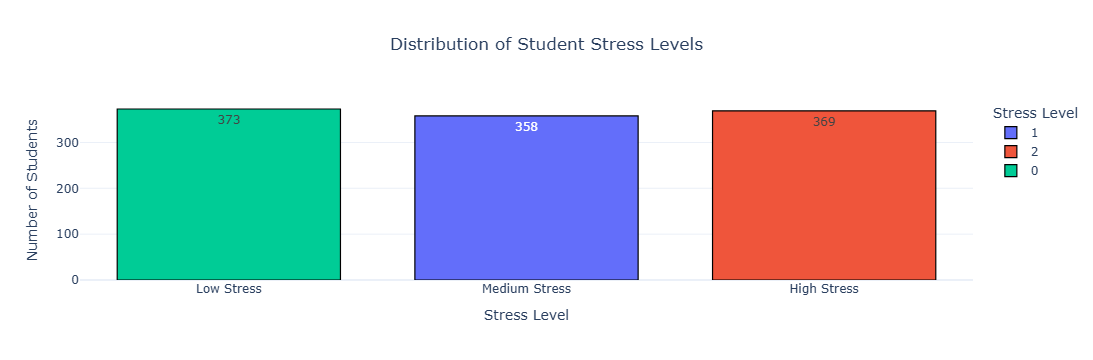

In [6]:
fig = px.histogram(
    df,
    x="stress_level",
    color="stress_level",
    nbins=3,
    title="Distribution of Student Stress Levels",
    labels={"stress_level": "Stress Level"},
    text_auto=True    #automatically shows the count on top of each bar
)

fig.update_layout(
    title_x=0.5,   #centers the title horizontally
    bargap=0.25,   #adds gap between bars (25% of bar width)
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 1, 2],
        ticktext=["Low Stress", "Medium Stress", "High Stress"]
    ),
    yaxis_title="Number of Students",
    template="plotly_white"
)

fig.update_traces(
    marker_line_width=1.2,
    marker_line_color="black"
)

fig.show()

### Mental Health Factors Across Stress Levels

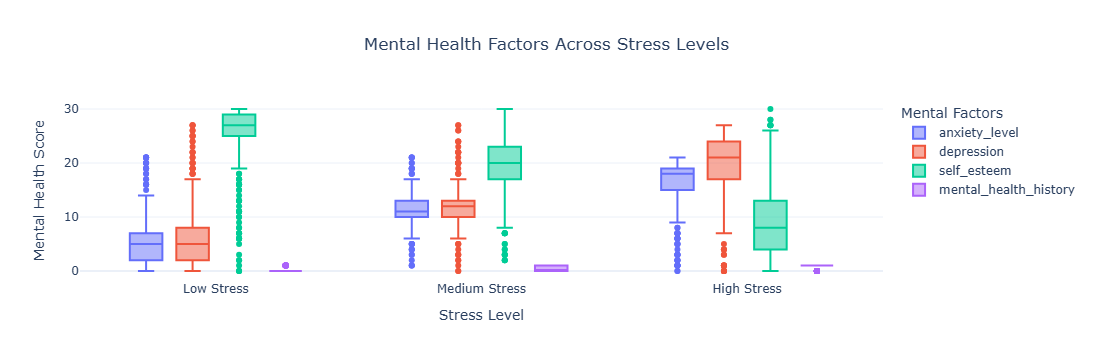

In [7]:
mental_cols = [
    "anxiety_level",
    "depression",
    "self_esteem",
    "mental_health_history"
]
# melt -> Converts the dataframe from wide format → long format (required for Plotly box plots).
df_long = df.melt(
    id_vars="stress_level",
    value_vars=mental_cols,
    var_name="Mental Factor",
    value_name="Score"
)
fig = px.box(
    df_long,
    x="stress_level",
    y="Score",
    color="Mental Factor",
    title="Mental Health Factors Across Stress Levels",
    labels={
        "stress_level": "Stress Level",
        "Score": "Mental Health Score"
    }
)

fig.update_layout(
    title_x=0.5,
    xaxis=dict(
        tickmode="array",
        tickvals=[0, 1, 2],
        ticktext=["Low Stress", "Medium Stress", "High Stress"]
    ),
    template="plotly_white",
    legend_title_text="Mental Factors"
)

fig.show()

### Sleep Quality vs Headaches by Stress Category

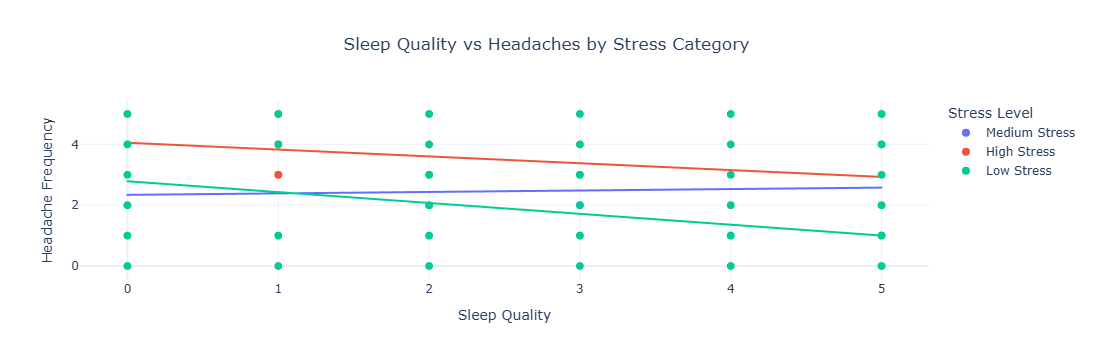

In [8]:
df["stress_label"] = df["stress_level"].map({
    0: "Low Stress",
    1: "Medium Stress",
    2: "High Stress"
})

fig = px.scatter(
    df,
    x="sleep_quality",
    y="headache",
    color="stress_label",
    trendline="ols",
    title="Sleep Quality vs Headaches by Stress Category"
)

fig.update_layout(
    title_x=0.5,
    template="plotly_white",
    legend_title_text="Stress Level",
    xaxis_title="Sleep Quality",
    yaxis_title="Headache Frequency"
)

fig.update_traces(marker=dict(size=8))

fig.show()

### Study Load vs Academic Performance by Stress Level

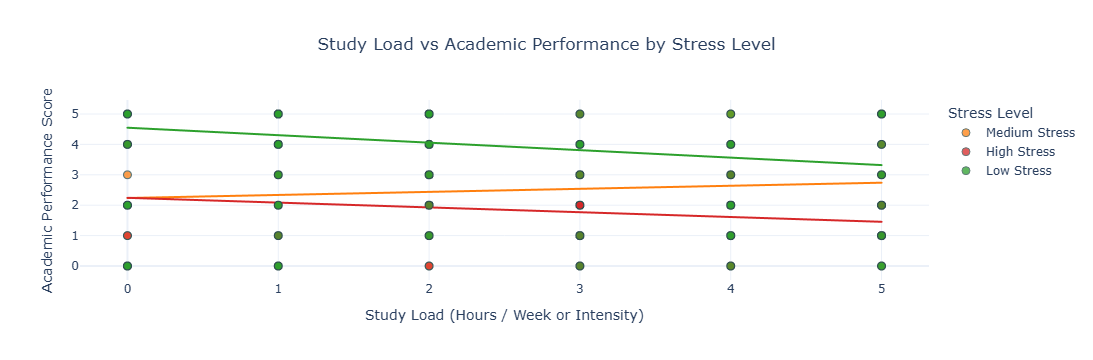

In [9]:
# Map stress levels to human-readable labels (if not already)
df["stress_label"] = df["stress_level"].map({
    0: "Low Stress",
    1: "Medium Stress",
    2: "High Stress"
})

# Create scatter plot
fig = px.scatter(
    df,
    x="study_load",
    y="academic_performance",
    color="stress_label",
    title="Study Load vs Academic Performance by Stress Level",
    labels={
        "study_load": "Study Load (Hours / Week or Intensity)",
        "academic_performance": "Academic Performance Score",
        "stress_label": "Stress Level"
    },
    trendline="ols",       # Adds linear regression line
    opacity=0.75,          # Makes overlapping points visible
    color_discrete_map={   # Professional, intuitive colors
        "Low Stress": "#2ca02c",      # green
        "Medium Stress": "#ff7f0e",   # orange
        "High Stress": "#d62728"      # red
    }
)

# Layout tweaks
fig.update_layout(
    title_x=0.5,
    template="plotly_white",
    xaxis=dict(tickmode="linear"),
    yaxis=dict(tickmode="linear"),
    legend_title_text="Stress Level",
)

# Marker style
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))

fig.show()

### Environmental Factors Across Stress Levels

In [10]:
env_cols = ["noise_level", "living_conditions", "safety"]

# Reshape data for Plotly
df_env_long = df.melt(
    id_vars="stress_level",
    value_vars=env_cols,
    var_name="Environmental Factor",
    value_name="Score"
)

# Map stress levels to readable labels
df_env_long["stress_label"] = df_env_long["stress_level"].map({
    0: "Low Stress",
    1: "Medium Stress",
    2: "High Stress"
})

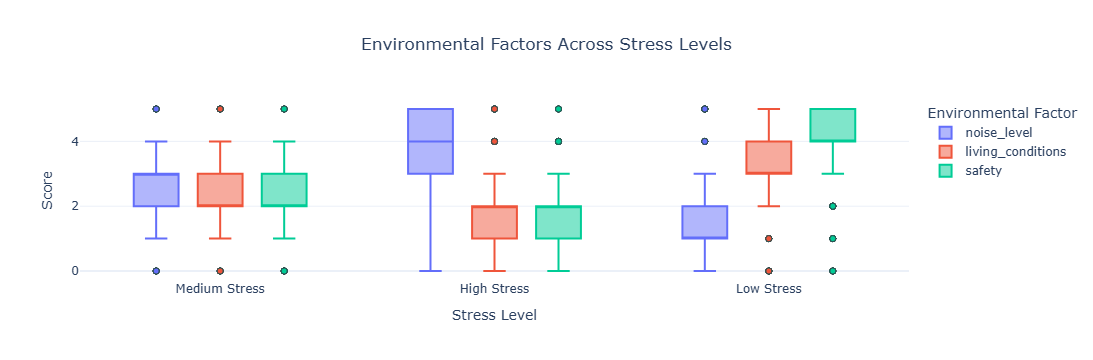

In [11]:
fig = px.box(
    df_env_long,
    x="stress_label",
    y="Score",
    color="Environmental Factor",
    title="Environmental Factors Across Stress Levels",
    labels={
        "stress_label": "Stress Level",
        "Score": "Score",
        "Environmental Factor": "Factor"
    }
)

fig.update_layout(
    title_x=0.5,
    template="plotly_white",
    xaxis=dict(tickmode="linear"),
    yaxis_title="Score",
    legend_title_text="Environmental Factor"
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()

### Impact of Study Load on Stress Level

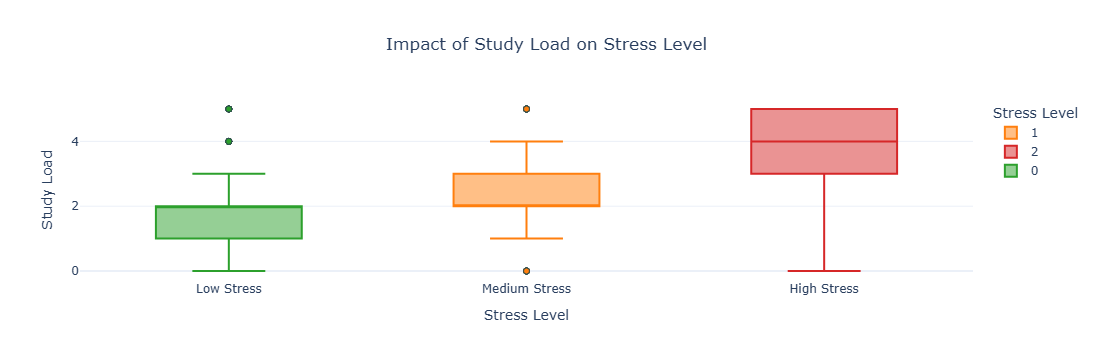

In [12]:
fig = px.box(
    df,
    x="stress_level",
    y="study_load",
    color="stress_level",   # Color by stress for visual clarity
    title="Impact of Study Load on Stress Level",
    labels={
        "stress_level": "Stress Level",
        "study_load": "Study Load (Hours / Intensity)"
    },
    color_discrete_map={
        0: "#2ca02c",  # Low Stress = Green
        1: "#ff7f0e",  # Medium Stress = Orange
        2: "#d62728"   # High Stress = Red
    }
)

fig.update_layout(
    title_x=0.5,  # Center the title
    template="plotly_white",
    xaxis=dict(
        tickmode="array",
        tickvals=[0,1,2],
        ticktext=["Low Stress", "Medium Stress", "High Stress"]
    ),
    yaxis_title="Study Load",
    legend_title_text="Stress Level"
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()

### Sleep Quality Across Stress Levels

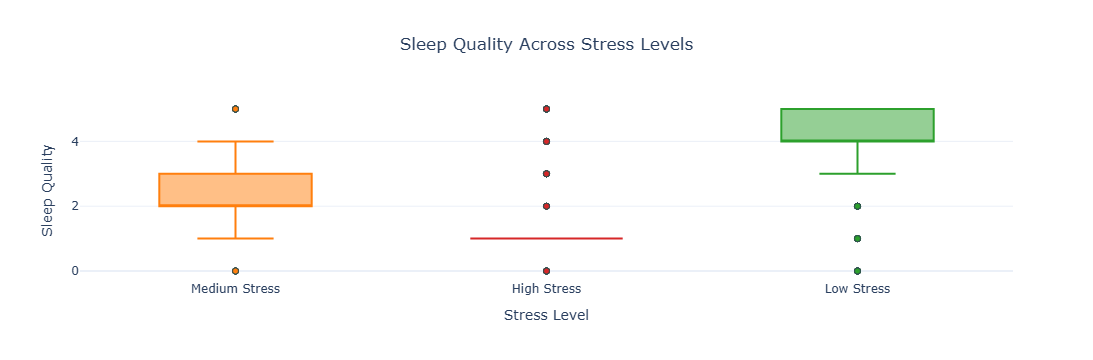

In [13]:
# Map stress levels to readable labels 
df["stress_label"] = df["stress_level"].map({
    0: "Low Stress",
    1: "Medium Stress",
    2: "High Stress"
})

# Create polished box plot
fig = px.box(
    df,
    x="stress_label",
    y="sleep_quality",
    color="stress_label",
    title="Sleep Quality Across Stress Levels",
    labels={
        "stress_label": "Stress Level",
        "sleep_quality": "Sleep Quality (Higher = Better)"
    },
    color_discrete_map={
        "Low Stress": "#2ca02c",     # Green
        "Medium Stress": "#ff7f0e",  # Orange
        "High Stress": "#d62728"     # Red
    }
)

# Layout tweaks
fig.update_layout(
    title_x=0.5,        # Center the title
    template="plotly_white",
    xaxis_title="Stress Level",
    yaxis_title="Sleep Quality",
    showlegend=False     # Legend not needed for single variable
)

# Add box outline for clarity
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()

### Social Support as a Buffer Against Stress

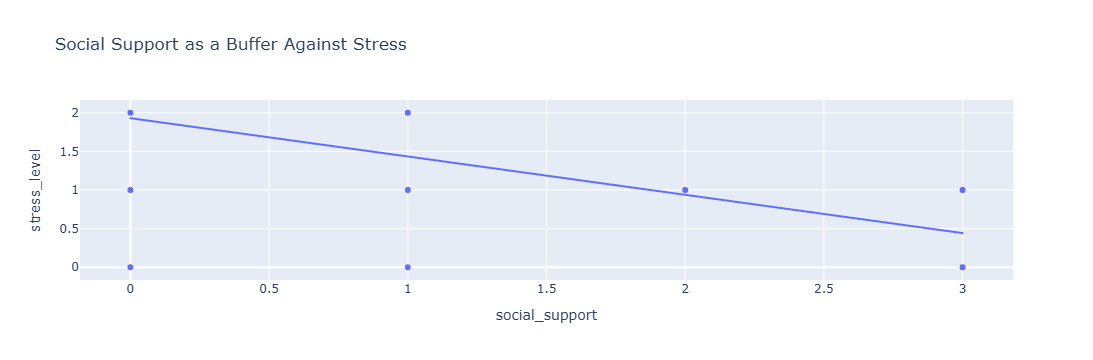

In [14]:
px.scatter(
    df,
    x="social_support",
    y="stress_level",
    title="Social Support as a Buffer Against Stress",
    trendline="ols"
)

### Relationship Between Anxiety and Stress

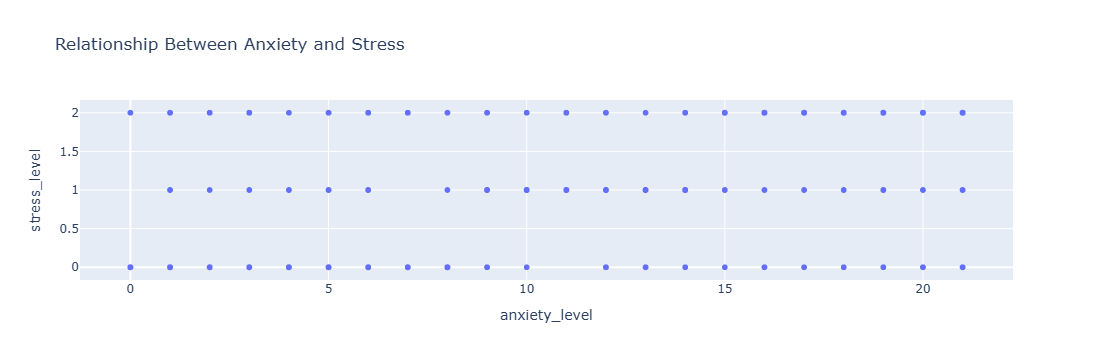

In [15]:
px.scatter(
    df,
    x="anxiety_level",
    y="stress_level",
    title="Relationship Between Anxiety and Stress"
)

# Logistic Regression

In [16]:
df["burnout_risk"] = df["stress_level"].map({
    0: "Low",
    1: "Medium",
    2: "High"
})

In [17]:
df["burnout_risk"].value_counts()

burnout_risk
Low       373
High      369
Medium    358
Name: count, dtype: int64

In [18]:
features = [
    "anxiety_level",
    "sleep_quality",
    "study_load",
    "academic_performance",
    "peer_pressure",
    "social_support",
    "future_career_concerns"
]

X = df[features]
y = df["burnout_risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.82      0.88      0.85        74
         Low       0.86      0.84      0.85        74
      Medium       0.90      0.86      0.88        72

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8590909090909091

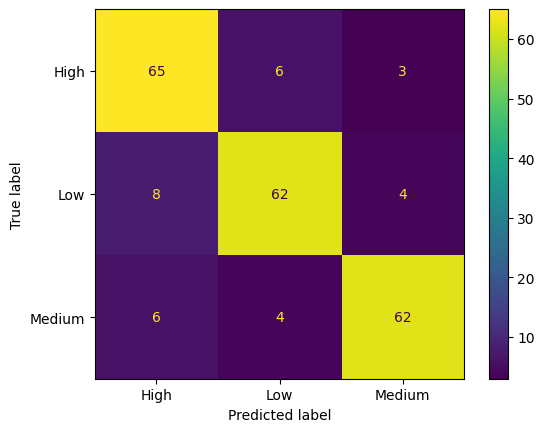

In [21]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [22]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Impact": abs(model.coef_).sum(axis=0)
}).sort_values(by="Impact", ascending=False).reset_index(drop=True)
importance

,Feature,Impact
0,social_support,1.928799
1,academic_performance,1.248411
2,sleep_quality,0.947484
3,future_career_concerns,0.898879
4,study_load,0.748457
5,peer_pressure,0.696353
6,anxiety_level,0.222475


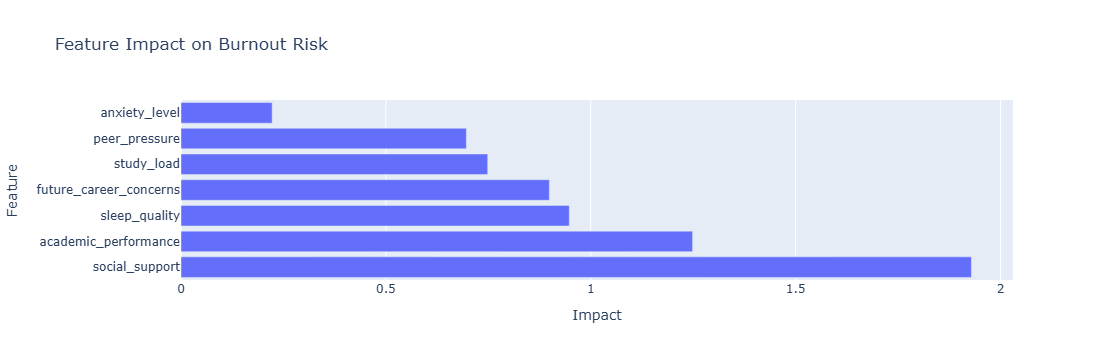

In [23]:
px.bar(
    importance,
    x="Impact",
    y="Feature",
    orientation="h",
    title="Feature Impact on Burnout Risk"
)

In [24]:
import joblib

joblib.dump(model, "stress_model.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")

['features.pkl']